# Proyek Analisis Data: PRSA Data Aotizhongxin
- **Nama:** Syarifa Dwi Purnamasari
- **Email:** syarifa.dwi.p@gmail.com
- **ID Dicoding:** syrifaa

## Menentukan Pertanyaan Bisnis

- What is the distribution of PM10 levels?
- What is the correlation between O3 and temperature levels?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
df = pd.read_csv('./PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [7]:
df.drop('No', axis=1, inplace=True)

**Insight:**
- Data yang diambil merupakan Air Quality Dataset Aotizhongxin
- Row 'No' di-drop karena tidak diperlukan dalam proses analisis data

### Assessing Data

#### Info Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34139 non-null  float64
 5   PM10     34346 non-null  float64
 6   SO2      34129 non-null  float64
 7   NO2      34041 non-null  float64
 8   CO       33288 non-null  float64
 9   O3       33345 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34983 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


#### Missing Value

In [9]:
print(df.isnull().sum())

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


#### Duplicated Value

In [10]:
print("\nDuplicated Data: ", len(df[df.duplicated()]))


Duplicated Data:  0


#### Unique Value

In [11]:
for col in df:
  print(f"{col}: ", len(df[col].unique()))

year:  5
month:  12
day:  31
hour:  24
PM2.5:  546
PM10:  634
SO2:  331
NO2:  466
CO:  113
O3:  832
TEMP:  968
PRES:  601
DEWP:  605
RAIN:  128
wd:  17
WSPM:  92
station:  1


#### Outlier


Outlier
Feature: year
Lower Bound: 2011.0
Upper Bound: 2019.0
Inside Range Outlier: 35064
Outside Range Outlier: 0



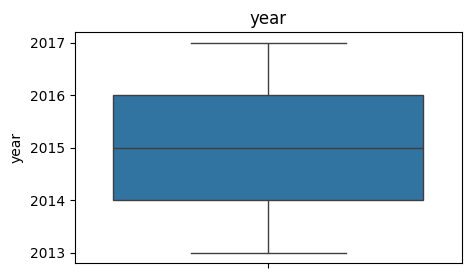

Feature: month
Lower Bound: -5.0
Upper Bound: 19.0
Inside Range Outlier: 35064
Outside Range Outlier: 0



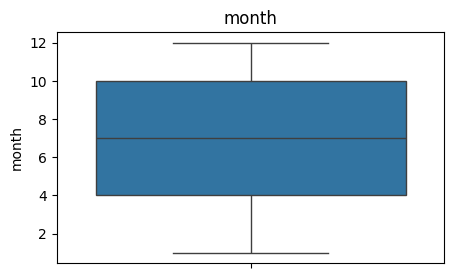

Feature: day
Lower Bound: -14.5
Upper Bound: 45.5
Inside Range Outlier: 35064
Outside Range Outlier: 0



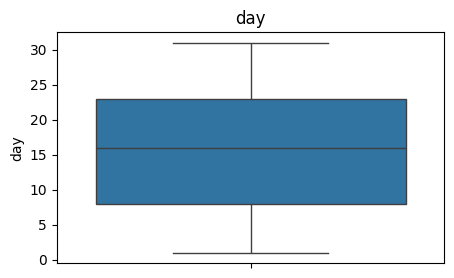

Feature: hour
Lower Bound: -11.5
Upper Bound: 34.5
Inside Range Outlier: 35064
Outside Range Outlier: 0



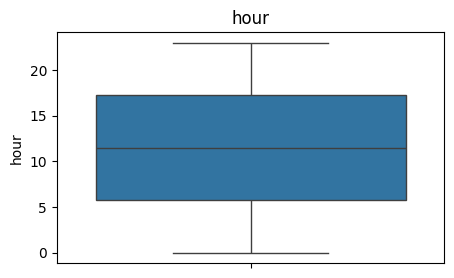

Feature: PM2.5
Lower Bound: -116.0
Upper Bound: 252.0
Inside Range Outlier: 32515
Outside Range Outlier: 1624



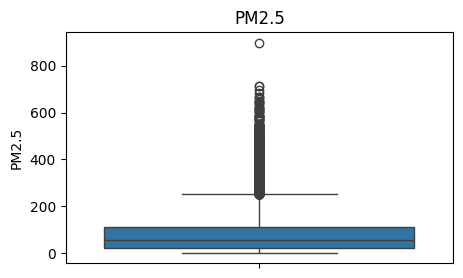

Feature: PM10
Lower Bound: -137.5
Upper Bound: 330.5
Inside Range Outlier: 33266
Outside Range Outlier: 1080



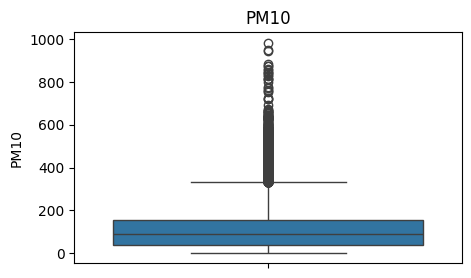

Feature: SO2
Lower Bound: -24.0
Upper Bound: 48.0
Inside Range Outlier: 31075
Outside Range Outlier: 3054



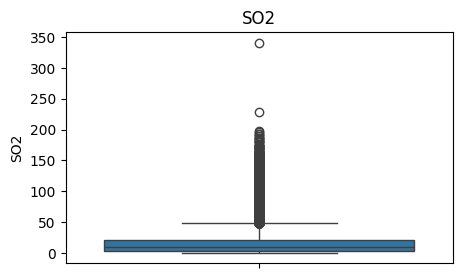

Feature: NO2
Lower Bound: -48.0
Upper Bound: 160.0
Inside Range Outlier: 33569
Outside Range Outlier: 472



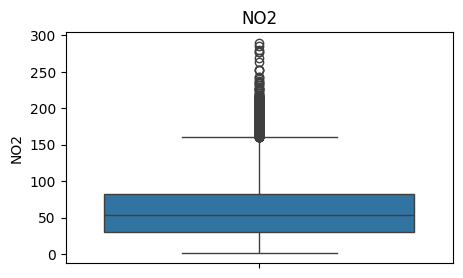

Feature: CO
Lower Bound: -1000.0
Upper Bound: 3000.0
Inside Range Outlier: 30681
Outside Range Outlier: 2607



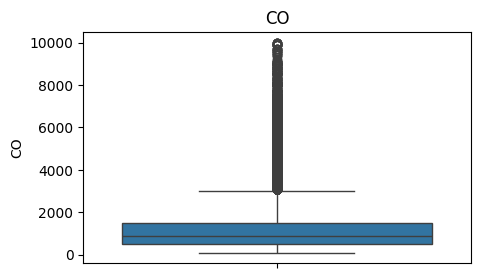

Feature: O3
Lower Bound: -103.0
Upper Bound: 193.0
Inside Range Outlier: 32035
Outside Range Outlier: 1310



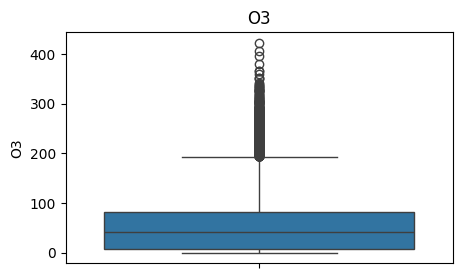

Feature: TEMP
Lower Bound: -27.199999999999996
Upper Bound: 53.599999999999994
Inside Range Outlier: 35044
Outside Range Outlier: 0



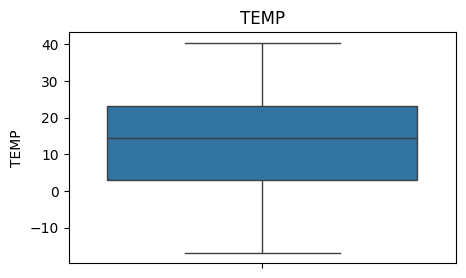

Feature: PRES
Lower Bound: 978.0999999999999
Upper Bound: 1045.3000000000002
Inside Range Outlier: 35044
Outside Range Outlier: 0



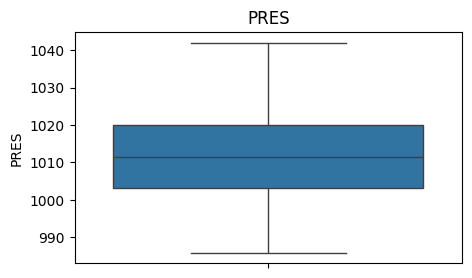

Feature: DEWP
Lower Bound: -43.65
Upper Bound: 51.15
Inside Range Outlier: 35044
Outside Range Outlier: 0



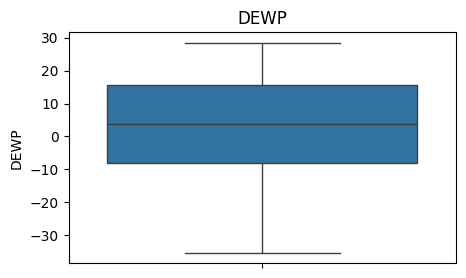

Feature: RAIN
Lower Bound: 0.0
Upper Bound: 0.0
Inside Range Outlier: 33664
Outside Range Outlier: 1380



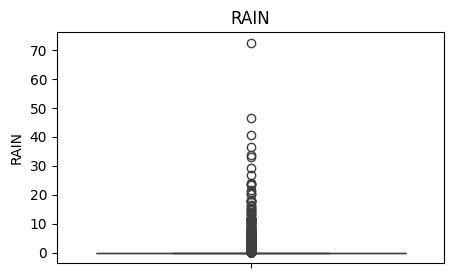

Feature: WSPM
Lower Bound: -1.0500000000000003
Upper Bound: 4.15
Inside Range Outlier: 33308
Outside Range Outlier: 1742



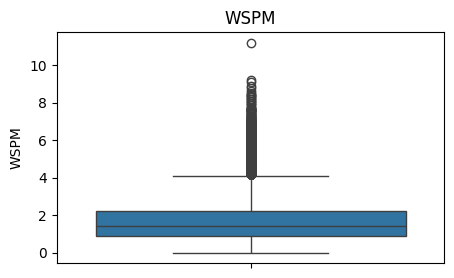

In [12]:
def outlier(data):
    for col in data.columns:
        if data[col].dtype in ["int64", "float64"]: 
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)

            unique_values = data[col].unique()

            inside_range = len(data[(data[col] >= lower_bound) & (data[col] <= upper_bound)])
            outside_range = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

            if (len(unique_values)) > 2:
                print("Feature: " + col)
                print("Lower Bound: " + str(lower_bound) + "\nUpper Bound: " + str(upper_bound))
                print("Inside Range Outlier: " + str(inside_range) + "\nOutside Range Outlier: " + str(outside_range) + "\n")

                plt.figure(figsize=(5, 3))
                sns.boxplot(data[col])
                plt.title(col)
                plt.show()

print("\nOutlier")
outlier(df)

**Insight:**
- Mayoritas data bertipe numerik
- Ditemukan beberapa missing value pada beberapa atribut
- Tidak ditemukan duplikat data
- Jumlah unique value beberapa atribut cenderung besar karena mayoritas data bersifat numerik
- Ditemukan outlier pada beberapa atribut bertipe numerik

### Cleaning Data

#### Handling Missing Value

In [13]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]: 
        if df[col].isnull().sum() > 0:
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value) 
    else:
        df = df.dropna(subset=[col])

#### Handling Outlier

Inside Range Outlier: 34983
Outside Range Outlier: 0



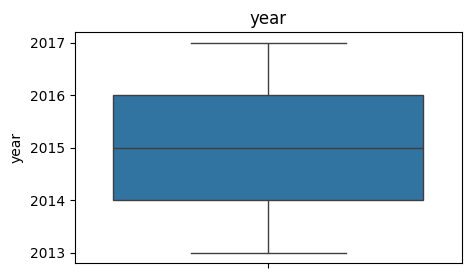

Inside Range Outlier: 34983
Outside Range Outlier: 0



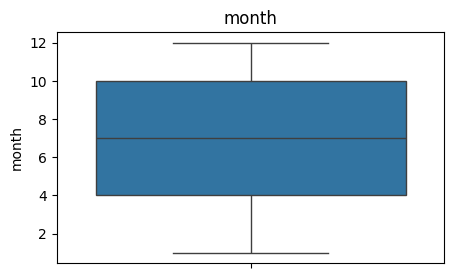

Inside Range Outlier: 34983
Outside Range Outlier: 0



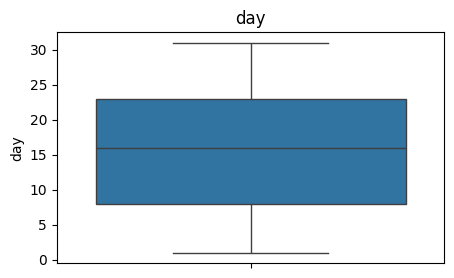

Inside Range Outlier: 34983
Outside Range Outlier: 0



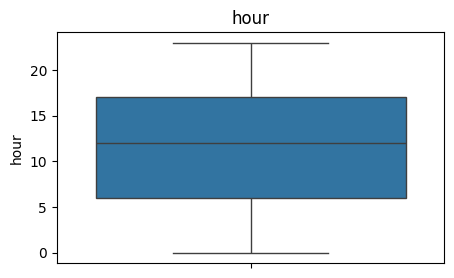

Inside Range Outlier: 33220
Outside Range Outlier: 0



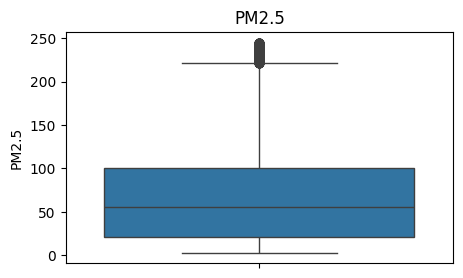

Inside Range Outlier: 32803
Outside Range Outlier: 0



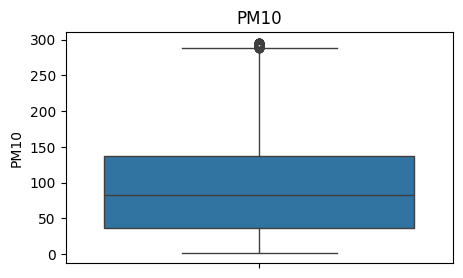

Inside Range Outlier: 29931
Outside Range Outlier: 0



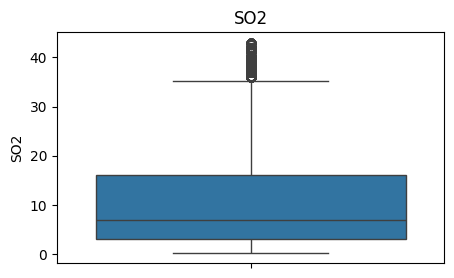

Inside Range Outlier: 29554
Outside Range Outlier: 0



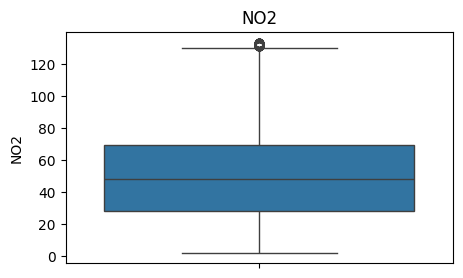

Inside Range Outlier: 28206
Outside Range Outlier: 0



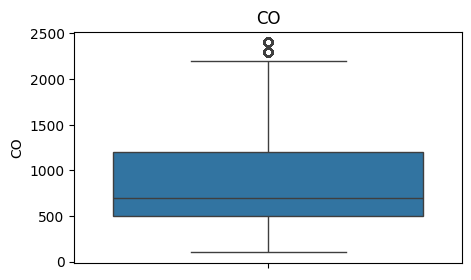

Inside Range Outlier: 26882
Outside Range Outlier: 0



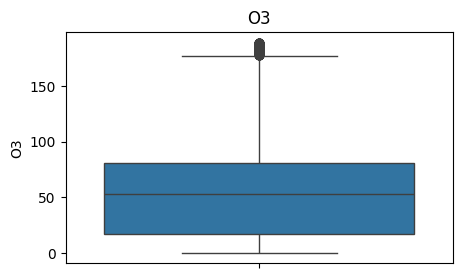

Inside Range Outlier: 26882
Outside Range Outlier: 0



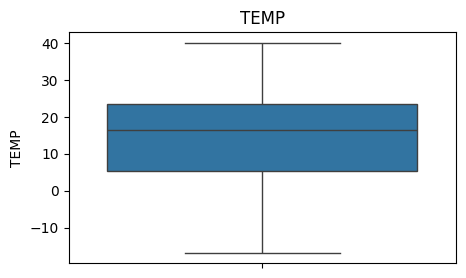

Inside Range Outlier: 26882
Outside Range Outlier: 0



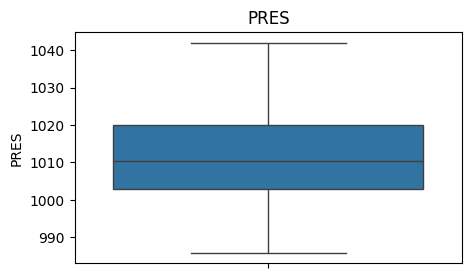

Inside Range Outlier: 26882
Outside Range Outlier: 0



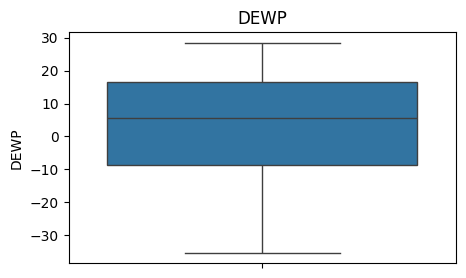

Inside Range Outlier: 25611
Outside Range Outlier: 0



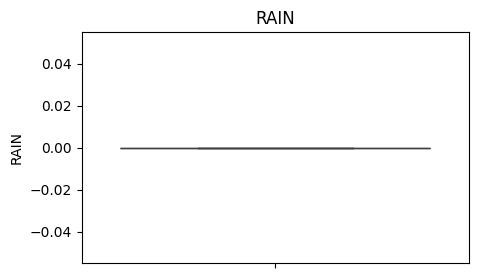

Inside Range Outlier: 24678
Outside Range Outlier: 0



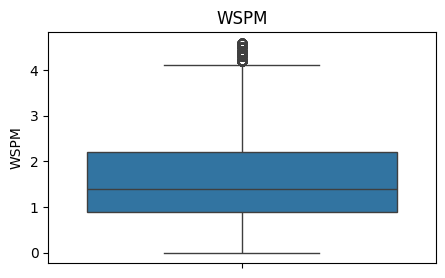

In [14]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]: 

        unique_values = df[col].unique()

        if (len(unique_values)) > 2:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)

            outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

            df.drop(outlier_rows.index, inplace=True)

            outside_range = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
            inside_range = len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])

            print("Inside Range Outlier: " + str(inside_range) + "\nOutside Range Outlier: " + str(outside_range) + "\n")
            plt.figure(figsize=(5, 3))
            sns.boxplot(df[col])
            plt.title(col)
            plt.show()

**Insight:**
- Handling missing value pada data numerik dilakukan dengan melakukan impute value tersebut dengan nilai mean atribut tersebut
- Handling missing value pada data non numerik dilakukan dengan melakukan drop column data yang mengandung missing value
- Handling outlier dilakukan dengan melakukan drop untuk setiap baris yang menjadi outlier

## Exploratory Data Analysis (EDA)

### Explore Statistic

In [15]:
df.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.0,24678,24678.000000,24678
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3538,NaN,24678
mean,2014.662858,6.630440,15.959357,11.230246,56.729938,80.533891,10.595729,51.372784,858.833247,55.010117,14.712649,1011.548812,3.562821,0.0,NaN,1.660147,NaN
std,1.181042,3.255574,8.808619,6.954660,47.541667,59.075969,9.476810,27.793073,500.897136,45.018476,10.946162,10.535741,14.133134,0.0,NaN,1.044531,NaN
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.300000,985.900000,-34.300000,0.0,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.000000,18.000000,31.000000,3.000000,29.000000,500.000000,16.000000,5.300000,1002.800000,-8.700000,0.0,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.000000,44.000000,69.000000,7.000000,49.000000,700.000000,51.000000,16.500000,1010.600000,5.500000,0.0,NaN,1.400000,NaN
75%,2016.000000,9.000000,24.000000,17.000000,82.773611,114.000000,16.000000,69.000000,1200.000000,80.000000,23.800000,1020.000000,16.300000,0.0,NaN,2.200000,NaN


### Explore Timeseries

In [16]:
def timeseries_analysis(attributes):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    att = df.resample('D', on='datetime')[attributes].mean()

    plt.figure(figsize=(10, 5))
    plt.plot(att)
    plt.title(f'Daily {attributes} Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel('µg/m³')
    plt.grid(True)
    plt.show()

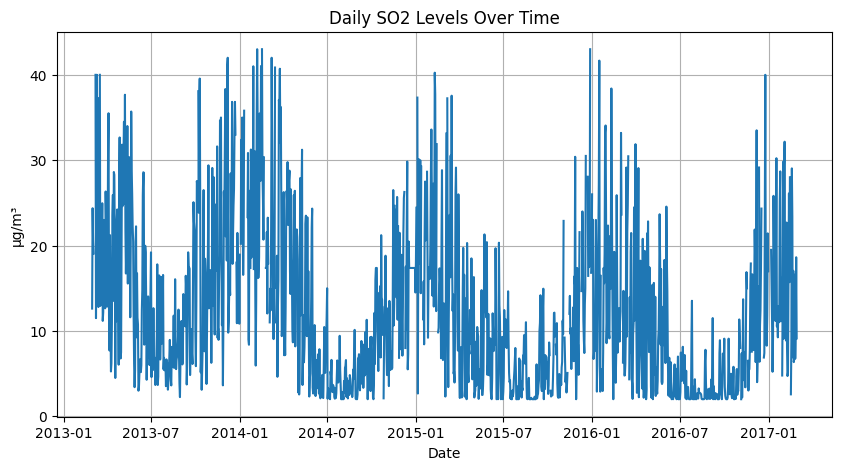

In [17]:
timeseries_analysis('SO2')

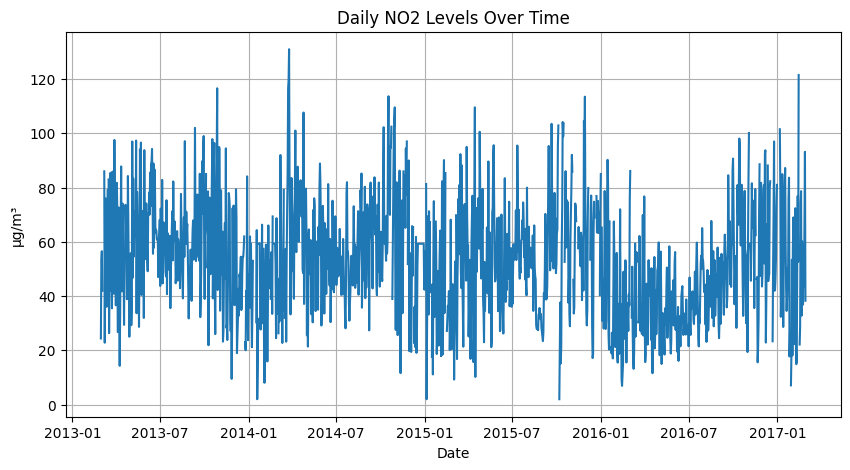

In [18]:
timeseries_analysis('NO2')

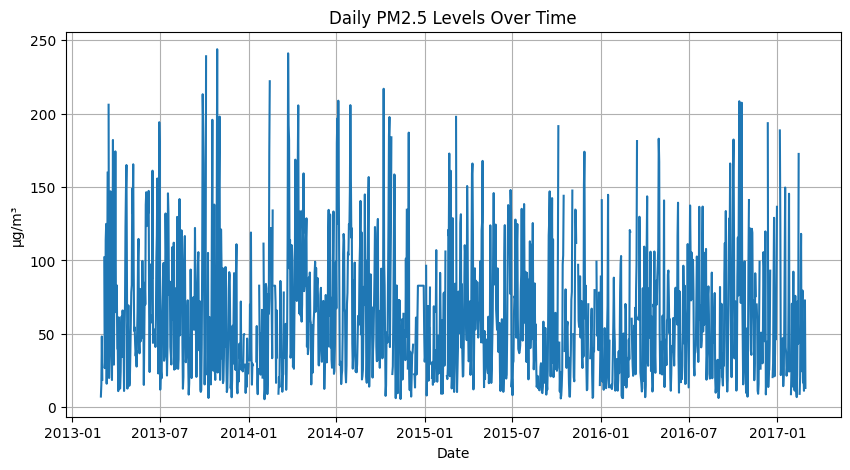

In [19]:
timeseries_analysis('PM2.5')

**Insight:**
- Dari ketiga timeseries plot diatas, tingkat SO2, N02, dan PM2.5 seiring waktu cenderung fluktuatif

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the distribution of PM10 levels?

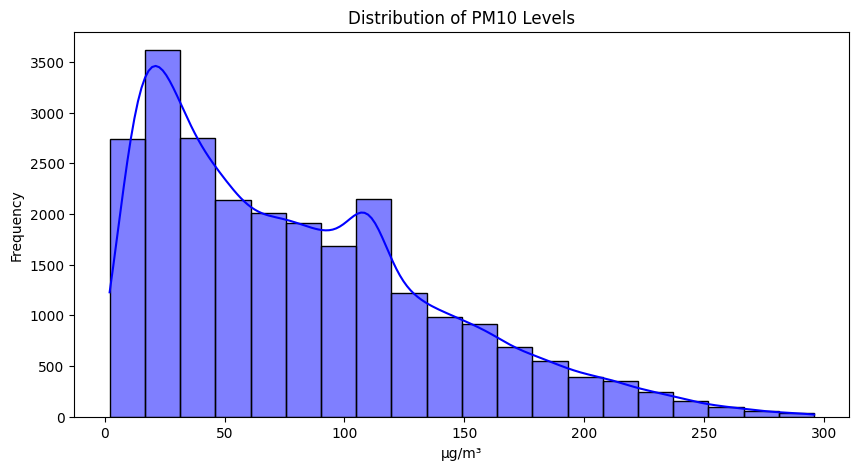

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PM10'], bins=20, kde=True, color='blue')
plt.title('Distribution of PM10 Levels')
plt.xlabel('µg/m³')
plt.ylabel('Frequency')
plt.show()

### Pertanyaan 2: What is the correlation between O3 and temperature levels?

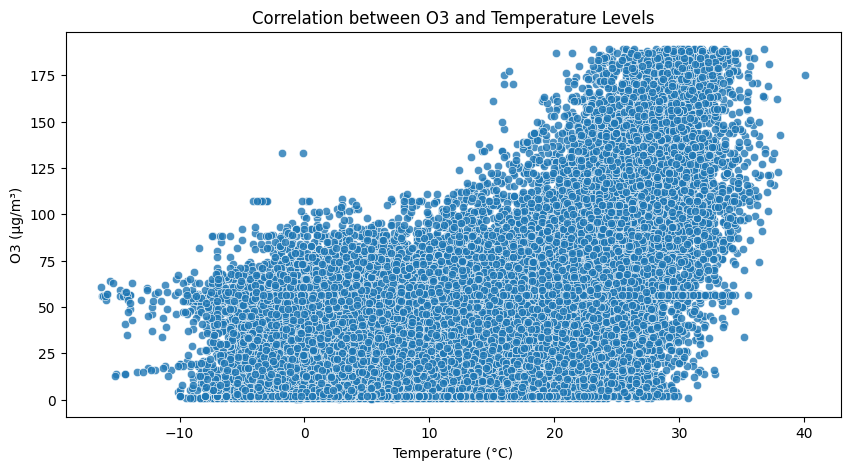

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TEMP', y='O3', data=df, alpha=0.8)
plt.title('Correlation between O3 and Temperature Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('O3 (µg/m³)')
plt.show()

**Insight:**
- Pada pertanyaan pertama, PM10 memiliki frekuensi paling tinggi pada range 0-50 µg/m³ dan semakin tinggi PM10, frekuensinya semakin mengecil
- Pada scatter plot pertanyaan kedua, dapat dilihat bahwa semakin tinggi temperatur, semakin tinggi pula tingkat O3

## Analisis Lanjutan (Clustering)

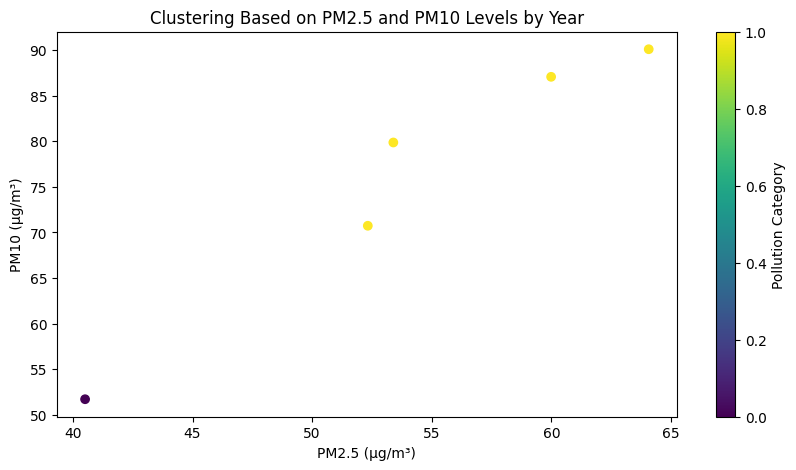

In [22]:
pollution_by_year = df.groupby('year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean'
}).reset_index()

def classify_pollution(pm_value):
    if pm_value <= 50:
        return 'Low'
    else:
        return 'High'

pollution_by_year['PM2.5_Category'] = pollution_by_year['PM2.5'].apply(classify_pollution)

plt.figure(figsize=(10, 5))
plt.scatter(pollution_by_year['PM2.5'], pollution_by_year['PM10'], 
            c=pollution_by_year['PM2.5_Category'].apply(lambda x: {'Low': 0, 'High': 1}[x]), 
            cmap='viridis')
plt.colorbar(label='Pollution Category')
plt.title('Clustering Based on PM2.5 and PM10 Levels by Year')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.show()

**Insight:**
- Data diatas hanya merekam air quality selama 5 tahun. Dari hasil clustering tersebut, 4 dari 5 tahun tersebut tercatat memiliki tingkat polusi yang tinggi berdasarkan level PM2.5 dan PM10 dan hanya 1 tahun saja yang tergolong rendah

## Conclusion

- Pada pertanyaan pertama, PM10 memiliki frekuensi paling tinggi pada range 0-50 µg/m³ dan semakin tinggi PM10, frekuensinya semakin mengecil
- Pada scatter plot pertanyaan kedua, dapat dilihat bahwa semakin tinggi temperatur, semakin tinggi pula tingkat O3